## Outline

**1st Experiment:** Dataset with all attributes(title, keywords, description) Combined without translation Before Preprocessing (Links should be removed) 
1. Data preparations (origional data without any translations)
2. Data preprocessing (General text processing)
1. Feature extraction (Uni, Uni-BI, Uni-Bi-Tri)
1. Models Training (Machine learning techniques: Logistic regression, SVM, MNB)
2. Evaluation


load the required libraries

In [1]:
import pandas as pd
import re
import numpy as np
import string
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse import hstack
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from pycaret.classification import setup, compare_models, predict_model
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from pycaret.classification import *
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/Data_All_Included.csv")

In [4]:
data[data['dataset']=='http://data.europa.eu/88u/dataset/-05d93b33-1058-4c8c-8267-857657765c30-']

,Unnamed: 0,dataset,title,keywords,description,theme,combined
4242,4242,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,HEAL,Areas of Potential Significant Flood Risk (APS...
39407,39407,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,ENVI,Areas of Potential Significant Flood Risk (APS...


In [5]:
data[data['dataset']=='http://data.europa.eu/88u/dataset/https-free-entryscape-com-store-302-resource-28']

,Unnamed: 0,dataset,title,keywords,description,theme,combined
4535,4535,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,ENER,Results from Global Data Barometer 2022 survey...
9106,9106,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,HEAL,Results from Global Data Barometer 2022 survey...
9298,9298,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,REGI,Results from Global Data Barometer 2022 survey...
9571,9571,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,TRAN,Results from Global Data Barometer 2022 survey...
11666,11666,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,EDUC,Results from Global Data Barometer 2022 survey...
12664,12664,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,SOCI,Results from Global Data Barometer 2022 survey...
18142,18142,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,JUST,Results from Global Data Barometer 2022 survey...
19451,19451,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,GOVE,Results from Global Data Barometer 2022 survey...
28173,28173,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,INTR,Results from Global Data Barometer 2022 survey...
29883,29883,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,AGRI,Results from Global Data Barometer 2022 survey...


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

let's check the either the datasets have more than one categories, and what are the highest number of themes to which a dataset belongs.

In [7]:
data.groupby(['dataset']).count().sort_values('theme', ascending=False)

,title,keywords,description,theme,combined
dataset,,,,,
http://data.europa.eu/88u/dataset/https-free-entryscape-com-store-302-resource-28,13,13,13,13,13
http://data.europa.eu/88u/dataset/https-data-norge-no-node-432,13,13,13,13,13
http://data.europa.eu/88u/dataset/urn-ine-es-oper-30715,11,11,11,11,11
http://data.europa.eu/88u/dataset/urn-ine-es-oper-30247,11,11,11,11,11
http://data.europa.eu/88u/dataset/urn-ine-es-oper-30601,11,11,11,11,11
...,...,...,...,...,...
http://data.europa.eu/88u/dataset/http-catalog-scb-se-resource-ssd-markaganderegionagar,1,1,1,1,1
http://data.europa.eu/88u/dataset/http-catalog-scb-se-resource-ssd-marintskyddn,1,1,1,1,1
http://data.europa.eu/88u/dataset/http-catalog-scb-se-resource-ssd-manadgiftskilsm,1,1,1,1,1


Now we have 29793 unique datasets although many of them belongs to more than one theme. Now, to deal with multi-label multi-class problem we need to encode our target labels. To do this, we will transform our target data to One-Hot Encoding. The get_dummies method in Pandas provides a convenient way to perform One-Hot Encoding on data.

In [8]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [9]:
encoded_data

,dataset,title,keywords,description,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,Graduados universitarios según hayan rechazado...,0,1,0,0,0,0,0,0,0,0,0,0,0
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity – the unique web of life on Earth...,Special Eurobarometer 436: Attitudes of Europe...,0,0,0,0,0,1,0,0,0,0,0,0,0
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,CORINE Land Cover changes Iceland 2018 (CHA) I...,0,0,0,0,1,0,0,0,0,0,0,0,0
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,Control de la empresa (público o privado). EAE...,0,1,0,0,0,0,0,0,0,0,0,0,0


now we have one hot encoding of our dataset, lets bring the dataset into one row of encoding which belongs to multiple themes. to do this just add sum() function at the end of groupby()

In [10]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined'], dtype='object')

In [11]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined']).sum().reset_index()

In [12]:
encoded_data

,dataset,title,keywords,description,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29790,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29791,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29792,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29793,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
encoded_data[encoded_data['dataset']=='http://data.europa.eu/88u/dataset/https-free-entryscape-com-store-302-resource-28']

,dataset,title,keywords,description,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
12387,http://data.europa.eu/88u/dataset/https-free-e...,Results from Global Data Barometer 2022,"survey, study, results, public good, barometer",The Global Data Barometer is a multi-dimension...,Results from Global Data Barometer 2022 survey...,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
encoded_data.to_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/All_included_one_hot_encoded_dataset.csv" )

In [16]:
#just run it once. no need to run it again
encoded_data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/All_included_one_hot_encoded_dataset.csv")

In [17]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description'], axis=1)
data

,Unnamed: 0,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1,coloniiT Species distribution colonii pasari i...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29790,29790,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29791,29791,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29792,29792,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29793,29793,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
# Text preprocessing function
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
nltk.download('words')
english_words = set(words.words())

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  

    # #remove non-english tokens
    # tokens=  [token for token in tokens if token in english_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    return " ".join(words)

# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [20]:
#Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_combined"] = data["combined"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [21]:
data[["combined","Preprocessed_combined"]]

,combined,Preprocessed_combined
0,Areas of Potential Significant Flood Risk (APS...,area potential significant flood risk apsfr hy...
1,coloniiT Species distribution colonii pasari i...,coloniit specie distribution colonii pasari rbdd
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first result eurobaromete...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected site zone tampon rbdd
...,...,...
29790,NFNET and Novel Food (Novel foods and food ing...,nfnet novel food novel food food ingredient th...
29791,"Youth hostels youth, tourist, tourism, hostel ...",youth hostel youth tourist tourism hostel loca...
29792,"Zen Car stations car, auto Location of the sta...",zen car station car auto location station zen ...
29793,Protection area 1 of water extraction - draina...,protection area water extraction drainage gall...


In [22]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'combined', 'theme_AGRI',
       'theme_ECON', 'theme_EDUC', 'theme_ENER', 'theme_ENVI', 'theme_GOVE',
       'theme_HEAL', 'theme_INTR', 'theme_JUST', 'theme_REGI', 'theme_SOCI',
       'theme_TECH', 'theme_TRAN', 'Preprocessed_combined'],
      dtype='object')

In [23]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_combined"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [24]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(20856, 8939)

In [26]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(20856, 8939)

#### 1.1- Machine Learning Models with **UNI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [27]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [28]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [29]:
len(Uni_gram_features.columns.to_list())

35891

In [30]:
print(Uni_gram_features.columns[100:400].to_list())

['abord', 'aborde', 'abordent', 'aborder', 'abords', 'abordé', 'abordées', 'abortion', 'abortive', 'abra', 'abrasion', 'abrasive', 'abrera', 'abres', 'abrigo', 'abril', 'abroad', 'abrogated', 'abrucena', 'abrupt', 'abruptly', 'abruzzo', 'absence', 'absent', 'absentee', 'absolue', 'absolute', 'absolutely', 'absoluto', 'absolutos', 'absoption', 'absorb', 'absorbed', 'absorber', 'absorbing', 'absorbs', 'absorption', 'abstain', 'abstainees', 'abstention', 'abstentionism', 'abstract', 'abstracted', 'abstraction', 'abundance', 'abundant', 'abundantly', 'abuse', 'abusejo', 'abwasser', 'abyssal', 'abáigar', 'abánades', 'abárzuza', 'ac', 'acabar', 'acabaron', 'academic', 'academici', 'academy', 'académicos', 'acanthias', 'acanthocranaus', 'acanthomorphic', 'acas', 'acc', 'accdetail', 'acceded', 'acceding', 'accelerated', 'accelerating', 'acceleration', 'accelerator', 'accelerometer', 'accentuated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepts', 'acces', 'accesibil

In [31]:
print(Uni_gram_features.sum().sort_values(ascending=False).head(100))

year           953.807821
de             835.945504
population     705.461585
sex            682.183336
education      538.258612
                  ...    
development    144.918732
value          144.128942
foreign        144.073508
consumption    143.834509
male           143.828032
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

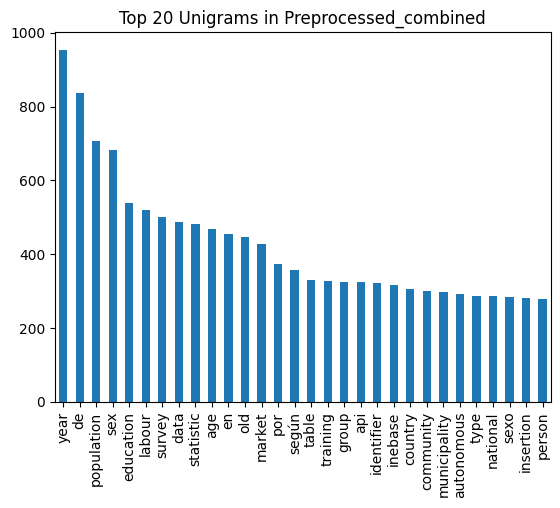

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

In [32]:
#Class Labels
class_names = data_labels = ['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

with multioutput classifier

In [33]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 88.8131%
              precision    recall  f1-score   support

           0       0.54      0.97      0.69        58
           1       0.94      0.98      0.96      2252
           2       0.92      1.00      0.96      1044
           3       0.74      0.99      0.85       176
           4       0.92      0.97      0.94      1665
           5       0.79      0.97      0.87       713
           6       0.84      0.99      0.91       591
           7       0.76      1.00      0.87       106
           8       0.70      1.00      0.82       136
           9       0.92      1.00      0.96       683
          10       0.94      0.99      0.97      2231
          11       0.87      0.98      0.92      1217
          12       0.31      0.97      0.47        30

   micro avg       0.89      0.98      0.93     10902
   macro avg       0.78      0.99      0.86     10902
weighted avg       0.90      0.98      0.94     10902
 samples avg       0.90      0.92      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 93.6570%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        84
           1       0.96      0.98      0.97      2306
           2       0.95      0.99      0.97      1090
           3       0.89      0.98      0.93       216
           4       0.96      0.97      0.96      1734
           5       0.89      0.96      0.92       819
           6       0.91      0.98      0.94       646
           7       0.86      0.99      0.92       120
           8       0.85      0.99      0.91       168
           9       0.95      0.99      0.97       709
          10       0.97      0.99      0.98      2300
          11       0.94      0.98      0.96      1322
          12       0.66      0.94      0.77        65

   micro avg       0.94      0.98      0.96     11579
   macro avg       0.89      0.97      0.93     11579
weighted avg       0.94      0.98      0.96     11579
 samples avg       0.95      0.96      0.95     11579





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 77.1003%
              precision    recall  f1-score   support

           0       0.01      0.33      0.02         3
           1       0.86      0.97      0.91      2098
           2       0.84      0.99      0.91       964
           3       0.69      1.00      0.82       165
           4       0.89      0.94      0.91      1653
           5       0.67      0.98      0.80       608
           6       0.62      0.99      0.77       439
           7       0.74      1.00      0.85       103
           8       0.19      0.95      0.32        39
           9       0.76      1.00      0.86       565
          10       0.90      0.97      0.94      2183
          11       0.77      0.96      0.85      1095
          12       0.00      0.00      0.00         2

   micro avg       0.80      0.97      0.87      9917
   macro avg       0.61      0.85      0.69      9917
weighted avg       0.83      0.97      0.89      9917
 samples avg       0.81      0.83      0.81      9917





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [34]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
   # 'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 88.8131%
              precision    recall  f1-score   support

           0       0.54      0.97      0.69        58
           1       0.94      0.98      0.96      2252
           2       0.92      1.00      0.96      1044
           3       0.74      0.99      0.85       176
           4       0.92      0.97      0.94      1665
           5       0.79      0.97      0.87       713
           6       0.84      0.99      0.91       591
           7       0.76      1.00      0.87       106
           8       0.70      1.00      0.82       136
           9       0.92      1.00      0.96       683
          10       0.94      0.99      0.97      2231
          11       0.87      0.98      0.92      1217
          12       0.31      0.97      0.47        30

   micro avg       0.89      0.98      0.93     10902
   macro avg       0.78      0.99      0.86     10902
weighted avg       0.90      0.98      0.94     10902
 samples avg       0.90      0.92      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 93.6570%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        84
           1       0.96      0.98      0.97      2306
           2       0.95      0.99      0.97      1090
           3       0.89      0.98      0.93       216
           4       0.96      0.97      0.96      1734
           5       0.89      0.96      0.92       819
           6       0.91      0.98      0.94       646
           7       0.86      0.99      0.92       120
           8       0.85      0.99      0.91       168
           9       0.95      0.99      0.97       709
          10       0.97      0.99      0.98      2300
          11       0.94      0.98      0.96      1322
          12       0.66      0.94      0.77        65

   micro avg       0.94      0.98      0.96     11579
   macro avg       0.89      0.97      0.93     11579
weighted avg       0.94      0.98      0.96     11579
 samples avg       0.95      0.96      0.95     11579





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 77.1003%
              precision    recall  f1-score   support

           0       0.01      0.33      0.02         3
           1       0.86      0.97      0.91      2098
           2       0.84      0.99      0.91       964
           3       0.69      1.00      0.82       165
           4       0.89      0.94      0.91      1653
           5       0.67      0.98      0.80       608
           6       0.62      0.99      0.77       439
           7       0.74      1.00      0.85       103
           8       0.19      0.95      0.32        39
           9       0.76      1.00      0.86       565
          10       0.90      0.97      0.94      2183
          11       0.77      0.96      0.85      1095
          12       0.00      0.00      0.00         2

   micro avg       0.80      0.97      0.87      9917
   macro avg       0.61      0.85      0.69      9917
weighted avg       0.83      0.97      0.89      9917
 samples avg       0.81      0.83      0.81      9917





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.multiclass import OneVsRestClassifier
SVM_model=OneVsRestClassifier(LinearSVC())
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('SVM Accuracy: {:.4f}%'.format(accuracy*100))
print(classification_report(y_pred, y_test))
print('\n')

SVM Accuracy: 93.6570%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        84
           1       0.96      0.98      0.97      2306
           2       0.95      0.99      0.97      1090
           3       0.89      0.98      0.93       216
           4       0.96      0.97      0.96      1734
           5       0.89      0.96      0.92       819
           6       0.91      0.98      0.94       646
           7       0.86      0.99      0.92       120
           8       0.85      0.99      0.91       168
           9       0.95      0.99      0.97       709
          10       0.97      0.99      0.98      2300
          11       0.94      0.98      0.96      1322
          12       0.66      0.94      0.77        65

   micro avg       0.94      0.98      0.96     11579
   macro avg       0.89      0.97      0.93     11579
weighted avg       0.94      0.98      0.96     11579
 samples avg       0.95      0.96      0.95     11579





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1- multi-label confusion matrix

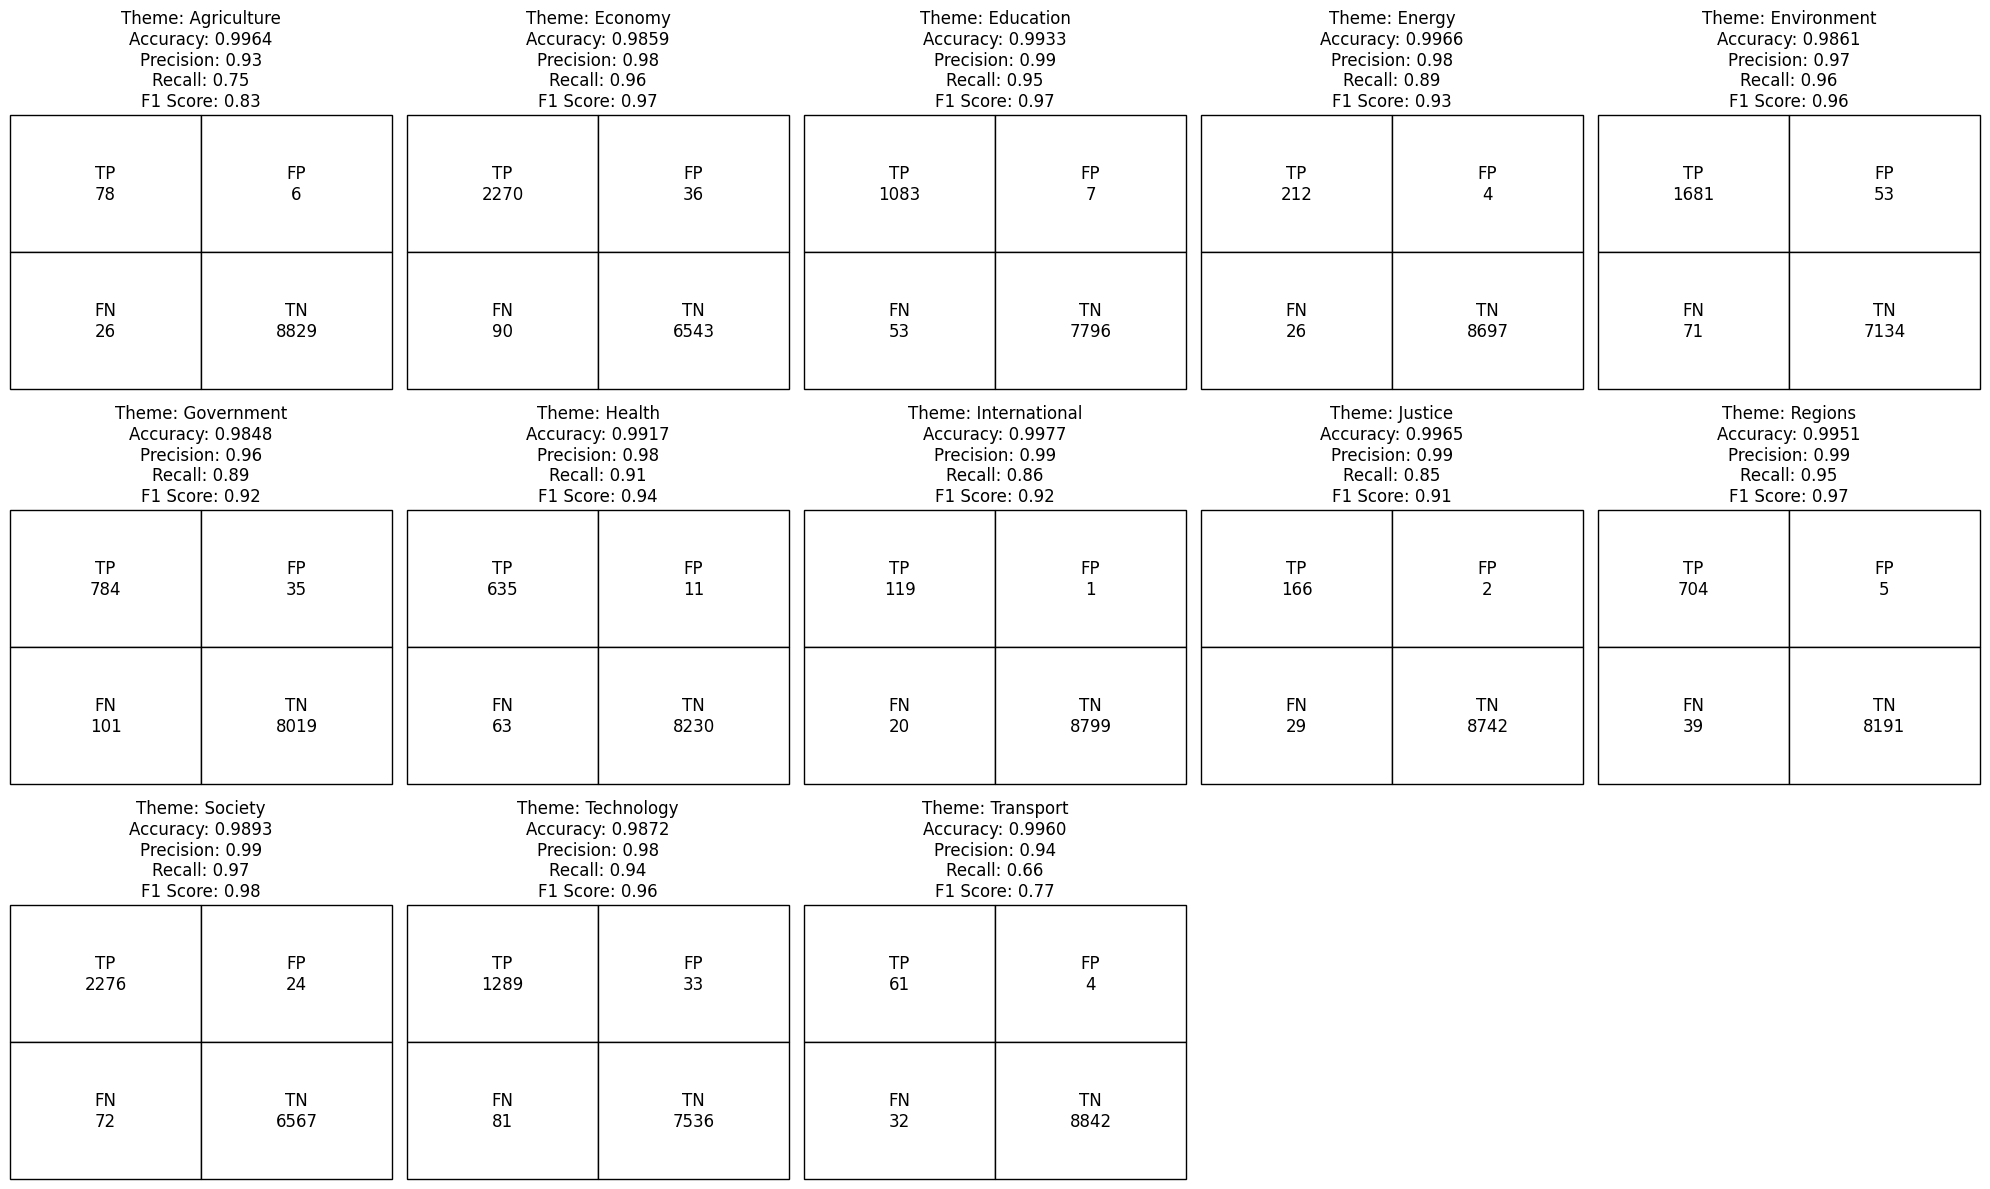

In [36]:
# plot confusion matrix for each class
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
# compute confusion matrix for each class
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, ax in enumerate(axs.flatten()):
    if i < len(class_names):
        tn, fp, fn, tp = cm[i].ravel()
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        
        cell_text = [[f'TP\n{tp}', f'FP\n{fp}'], [f'FN\n{fn}', f'TN\n{tn}']]
        
        # remove axis ticks
        ax.axis('off')
        # ax.set_xticks([1,0])
        # ax.set_yticks([1,0])
        # ax.set_xticklabels([1,0],  ha="center", va="center")
        # ax.set_yticklabels([1,0], ha="center", va="center")

        # ax.xaxis.tick_top()
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        # ax.tick_params(axis='both', which='major', pad=10)
        
        # add table to the plot
        table = ax.table(cellText=cell_text, cellLoc='center', loc='center', bbox=[0,0,1,1])
        
        # modify table properties
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1, 2)
        
        # set title
        ax.set_title(f'Theme: {class_names[i]}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1_score:.2f}')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Thematic Annotation of Government data/results/allinoneconfusionmatrix_in_a_table.png", dpi=1000)
plt.show()

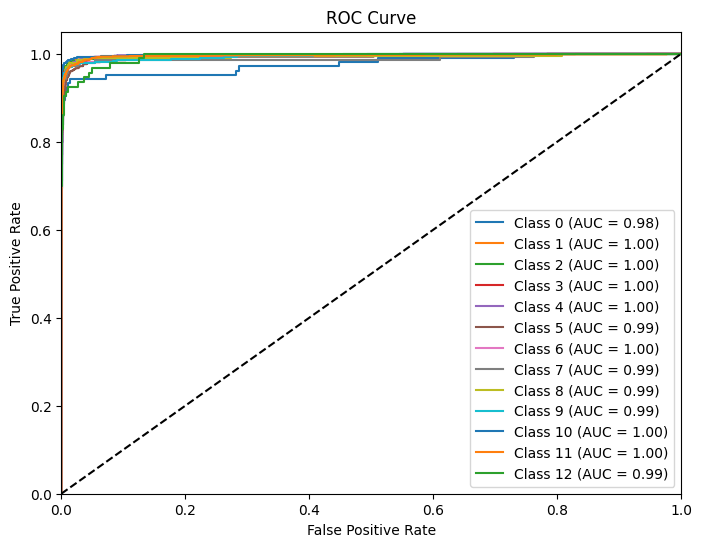

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# fit the model
clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(X_train, y_train)

# compute AUC-ROC and plot ROC curve for each class
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_pred_proba = clf.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_pred_proba)
    roc_auc[i] = roc_auc_score(y_test.iloc[:, i], y_pred_proba)

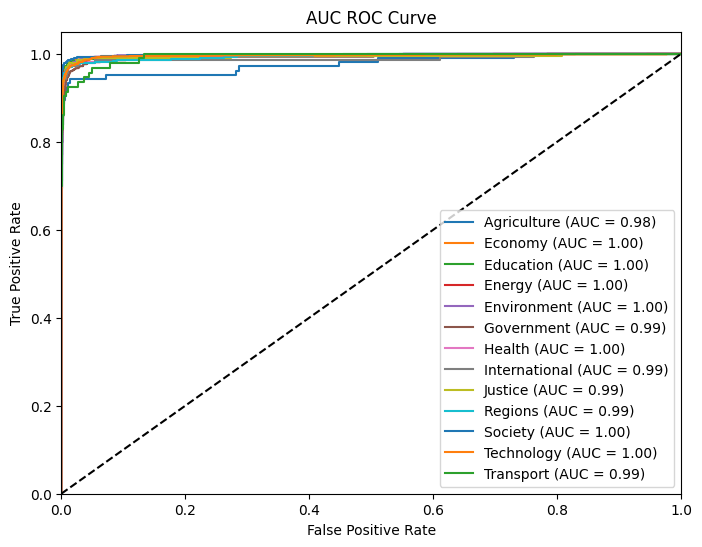

In [ ]:
# plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Thematic Annotation of Government data/results/ROC_AUC_curve.png', dpi=1000, bbox_inches='tight')
plt.show()

#### 1.2- Machine Learning Models with **BI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest


Only Bi-Grams and Tri-Grams features are not giving good accuracy, the reasons behind this could be:
* Sparse Data: In general, the higher the n-gram, the sparser the data, because 
 the probability of a particular sequence of n words appearing in the text decreases as n increases. This makes it harder for the model to learn patterns from bigrams or trigrams.

* Less Generalizable: N-grams, especially as n increases, tend to be more specific and less generalizable. For example, the bigram "New York" has a more specific meaning than the unigrams "New" and "York". This means that the model trained on bigrams and trigrams might not perform well when tested on new data that contains different bigrams and trigrams.

* Lack of Context: Bigrams and trigrams provide some context by grouping adjacent words together, but they might not capture the full context, especially for longer phrases or sentences. Unigrams, on the other hand, completely ignore the context.

* Computational Complexity: The number of possible n-grams increases exponentially with n, which can increase the computational complexity and memory requirements of the model. This might make it harder for the model to learn from the bigrams or trigrams.

* Overfitting: Due to the specificity of higher n-grams, a model trained on them could overfit to the training data. Overfitting means that the model performs well on the training data but poorly on new, unseen data, which would show as low accuracy.


In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(2,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Bi_gram_features.columns.to_list())

254709

In [ ]:
print(Bi_gram_features.columns[100:400].to_list())

['abandonarlo de', 'abandonarlo en', 'abandonaro api', 'abandonaron de', 'abandonaron el', 'abandonaron la', 'abandonaron los', 'abandonaron por', 'abandoned act', 'abandoned agricultural', 'abandoned coalfield', 'abandoned mine', 'abandoned mining', 'abandoned prior', 'abandoned since', 'abandoned urban', 'abandoned working', 'abandonment distinguishable', 'abandonment mine', 'abandonment plan', 'abanilla serrato', 'abanto ciérvana', 'abanto zamora', 'abanto zierbena', 'abarca de', 'abartzuza abáigar', 'abarán abanilla', 'abatement measure', 'abatement mining', 'abatement technology', 'abaurrea alta', 'abaurrea baja', 'abaurregaina abaurrea', 'abaurrepea abaurrea', 'abbadia et', 'abbas humer', 'abbey st', 'abbreviated labelone', 'abbreviated rb', 'abbreviated table', 'abbreviated wb', 'abbreviation avg', 'abbreviation bts', 'abbreviation dgm', 'abbreviation documenting', 'abbreviation functional', 'abbreviation given', 'abbreviation region', 'abbreviation rohstoffgewinnungsstelle', 'a

In [ ]:
print(Bi_gram_features.sum().sort_values(ascending=False).head(100))

year old               370.824247
labour market          329.985164
old year               267.614954
api identifier         262.037730
table inebase          256.480418
                          ...    
collected ecosystem     67.875702
file collected          67.875702
jobadlinks job          67.875702
gz occupation           67.875702
sex autonomous          67.822726
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

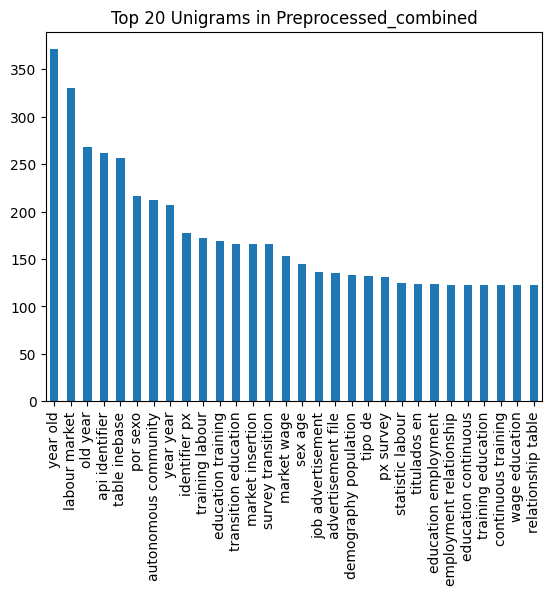

In [ ]:
Bi_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
#Class Labels
class_names = data_labels = ['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
   # 'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
SVM_model=OneVsRestClassifier(LinearSVC())
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('SVM Accuracy: {:.4f}%'.format(accuracy*100))
print(classification_report(y_pred, y_test))
print('\n')

SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1- multi-label confusion matrix

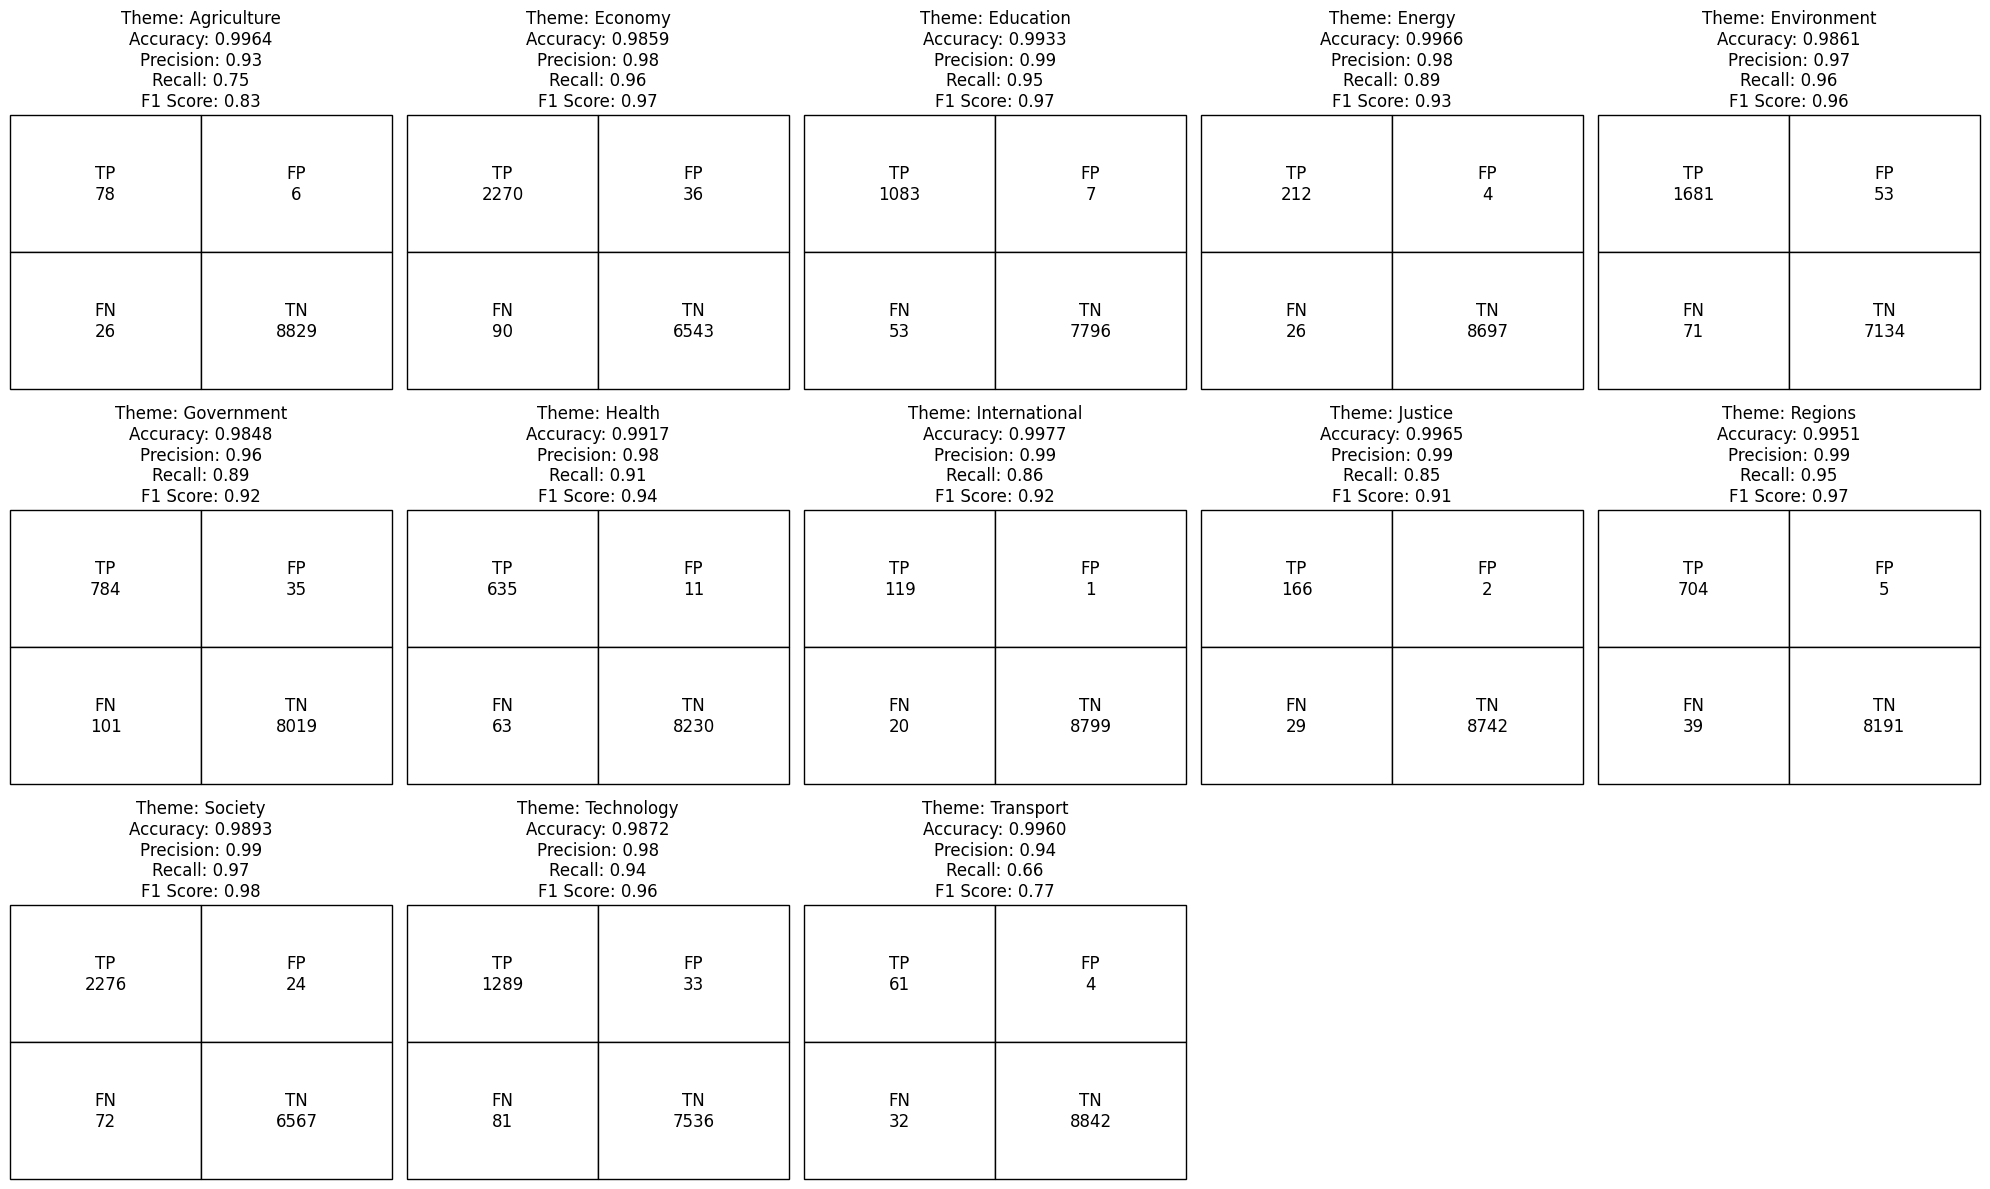

In [ ]:
# plot confusion matrix for each class
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
# compute confusion matrix for each class
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, ax in enumerate(axs.flatten()):
    if i < len(class_names):
        tn, fp, fn, tp = cm[i].ravel()
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        
        cell_text = [[f'TP\n{tp}', f'FP\n{fp}'], [f'FN\n{fn}', f'TN\n{tn}']]
        
        # remove axis ticks
        ax.axis('off')
        # ax.set_xticks([1,0])
        # ax.set_yticks([1,0])
        # ax.set_xticklabels([1,0],  ha="center", va="center")
        # ax.set_yticklabels([1,0], ha="center", va="center")

        # ax.xaxis.tick_top()
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        # ax.tick_params(axis='both', which='major', pad=10)
        
        # add table to the plot
        table = ax.table(cellText=cell_text, cellLoc='center', loc='center', bbox=[0,0,1,1])
        
        # modify table properties
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1, 2)
        
        # set title
        ax.set_title(f'Theme: {class_names[i]}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1_score:.2f}')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### 1.3- Machine Learning Models with **TRI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(3,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Tri_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Tri_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Tri_gram_features.columns.to_list())

369280

In [ ]:
print(Tri_gram_features.columns[100:400].to_list())

['abajo candelario campo', 'abajo caracena carabantes', 'abajo castrojimeno castro', 'abajo cedillo de', 'abajo cillaperlata ciadoncha', 'abajo cogolludo cogollor', 'abajo cubillos del', 'abajo encina de', 'abajo fermoselle fariza', 'abajo malpartida maíllo', 'abajo megeces medina', 'abajo orbaneja riopico', 'abajo peleagonzalo pego', 'abajo peñarandilla peñaranda', 'abajo piña de', 'abajo rubena royuela', 'abajo sotoserrano sorihuela', 'abajo villoslada de', 'abajo yebra yebes', 'abala well lat', 'abaltzisketa semillas zorita', 'abandonado el sistema', 'abandonar los estudios', 'abandonar por sexo', 'abandonar por tiempo', 'abandonarlo de nuevo', 'abandonarlo en según', 'abandonaro api identifier', 'abandonaron de nuevo', 'abandonaron el sistema', 'abandonaron la eso', 'abandonaron los estudios', 'abandonaron por ccaa', 'abandonaron por sexo', 'abandoned act holding', 'abandoned agricultural land', 'abandoned coalfield data', 'abandoned mine coal', 'abandoned mine collection', 'abando

In [ ]:
print(Tri_gram_features.sum().sort_values(ascending=False).head(100))

year old year                         262.251157
old year old                          224.794548
api identifier px                     168.612468
education training labour             155.319479
training labour market                155.319479
                                         ...    
female demography population           49.738343
demography population construction     49.335532
population construction housing        49.335532
national survey labour                 48.213574
de máster según                        48.070468
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

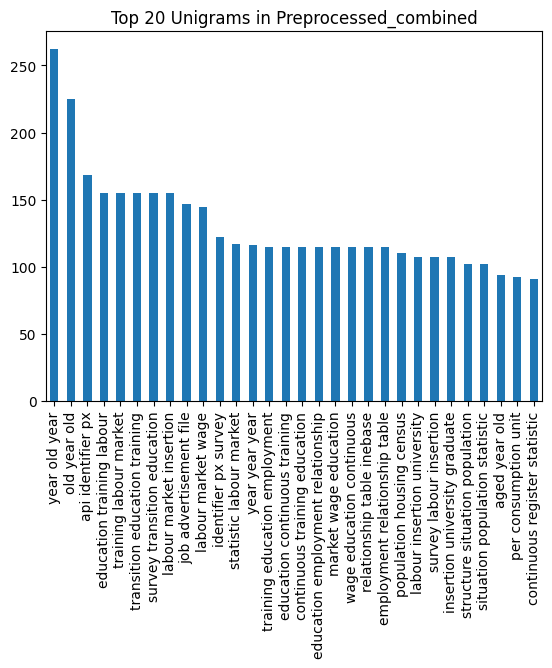

In [ ]:
Tri_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
#Class Labels
class_names = data_labels = ['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
   # 'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
SVM_model=OneVsRestClassifier(LinearSVC())
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('SVM Accuracy: {:.4f}%'.format(accuracy*100))
print(classification_report(y_pred, y_test))
print('\n')

SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1.4 Machine Learning Models with Uni+Bigrams

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

290600

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 84.1146%
              precision    recall  f1-score   support

           0       0.17      0.95      0.29        19
           1       0.92      0.97      0.94      2245
           2       0.88      1.00      0.94      1010
           3       0.72      0.99      0.83       173
           4       0.90      0.95      0.93      1661
           5       0.74      0.96      0.84       687
           6       0.80      0.99      0.88       562
           7       0.74      1.00      0.85       103
           8       0.58      1.00      0.74       114
           9       0.88      0.99      0.93       657
          10       0.93      0.95      0.94      2301
          11       0.84      0.97      0.90      1189
          12       0.28      1.00      0.44        26

   micro avg       0.86      0.97      0.91     10747
   macro avg       0.72      0.98      0.80     10747
weighted avg       0.88      0.97      0.92     10747
 samples avg       0.88      0.89      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 89.9541%
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        76
           1       0.95      0.97      0.96      2317
           2       0.95      0.99      0.97      1088
           3       0.87      0.97      0.92       213
           4       0.95      0.96      0.96      1736
           5       0.87      0.94      0.90       814
           6       0.89      0.97      0.93       636
           7       0.81      1.00      0.90       113
           8       0.81      0.99      0.89       159
           9       0.91      0.99      0.95       685
          10       0.95      0.94      0.95      2360
          11       0.93      0.96      0.95      1322
          12       0.66      0.90      0.76        68

   micro avg       0.93      0.96      0.94     11587
   macro avg       0.86      0.96      0.91     11587
weighted avg       0.93      0.96      0.94     11587
 samples avg       0.94      0.94      0.93     11587





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 57.3778%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.74      0.98      0.85      1786
           2       0.83      1.00      0.91       943
           3       0.69      1.00      0.82       164
           4       0.75      0.99      0.86      1337
           5       0.42      1.00      0.59       368
           6       0.22      1.00      0.37       156
           7       0.06      1.00      0.11         8
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50       246
          10       0.73      1.00      0.84      1712
          11       0.54      1.00      0.70       739
          12       0.00      0.00      0.00         0

   micro avg       0.61      0.99      0.76      7459
   macro avg       0.41      0.77      0.50      7459
weighted avg       0.69      0.99      0.80      7459
 samples avg       0.61      0.65      0.63      7459





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 84.1146%
              precision    recall  f1-score   support

           0       0.17      0.95      0.29        19
           1       0.92      0.97      0.94      2245
           2       0.88      1.00      0.94      1010
           3       0.72      0.99      0.83       173
           4       0.90      0.95      0.93      1661
           5       0.74      0.96      0.84       687
           6       0.80      0.99      0.88       562
           7       0.74      1.00      0.85       103
           8       0.58      1.00      0.74       114
           9       0.88      0.99      0.93       657
          10       0.93      0.95      0.94      2301
          11       0.84      0.97      0.90      1189
          12       0.28      1.00      0.44        26

   micro avg       0.86      0.97      0.91     10747
   macro avg       0.72      0.98      0.80     10747
weighted avg       0.88      0.97      0.92     10747
 samples avg       0.88      0.89      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 89.9541%
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        76
           1       0.95      0.97      0.96      2317
           2       0.95      0.99      0.97      1088
           3       0.87      0.97      0.92       213
           4       0.95      0.96      0.96      1736
           5       0.87      0.94      0.90       814
           6       0.89      0.97      0.93       636
           7       0.81      1.00      0.90       113
           8       0.81      0.99      0.89       159
           9       0.91      0.99      0.95       685
          10       0.95      0.94      0.95      2360
          11       0.93      0.96      0.95      1322
          12       0.66      0.90      0.76        68

   micro avg       0.93      0.96      0.94     11587
   macro avg       0.86      0.96      0.91     11587
weighted avg       0.93      0.96      0.94     11587
 samples avg       0.94      0.94      0.93     11587





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 57.3778%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.74      0.98      0.85      1786
           2       0.83      1.00      0.91       943
           3       0.69      1.00      0.82       164
           4       0.75      0.99      0.86      1337
           5       0.42      1.00      0.59       368
           6       0.22      1.00      0.37       156
           7       0.06      1.00      0.11         8
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50       246
          10       0.73      1.00      0.84      1712
          11       0.54      1.00      0.70       739
          12       0.00      0.00      0.00         0

   micro avg       0.61      0.99      0.76      7459
   macro avg       0.41      0.77      0.50      7459
weighted avg       0.69      0.99      0.80      7459
 samples avg       0.61      0.65      0.63      7459





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1.5 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

659880

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 80.7361%
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         2
           1       0.92      0.95      0.94      2275
           2       0.87      0.99      0.93       998
           3       0.71      0.99      0.83       170
           4       0.90      0.94      0.92      1684
           5       0.73      0.96      0.83       676
           6       0.78      0.99      0.88       552
           7       0.74      1.00      0.85       103
           8       0.55      1.00      0.71       108
           9       0.87      0.99      0.93       657
          10       0.91      0.90      0.90      2379
          11       0.81      0.96      0.88      1156
          12       0.24      1.00      0.38        22

   micro avg       0.85      0.95      0.90     10782
   macro avg       0.70      0.98      0.77     10782
weighted avg       0.87      0.95      0.90     10782
 samples avg       0.86      0.87      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 85.0319%
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        72
           1       0.95      0.95      0.95      2363
           2       0.95      0.98      0.96      1096
           3       0.87      0.88      0.88       234
           4       0.95      0.95      0.95      1747
           5       0.87      0.93      0.90       828
           6       0.89      0.97      0.93       641
           7       0.80      1.00      0.89       111
           8       0.78      0.97      0.87       157
           9       0.91      0.98      0.94       688
          10       0.94      0.84      0.89      2646
          11       0.92      0.95      0.94      1319
          12       0.67      0.82      0.73        76

   micro avg       0.92      0.93      0.93     11978
   macro avg       0.86      0.94      0.89     11978
weighted avg       0.93      0.93      0.93     11978
 samples avg       0.94      0.92      0.92     11978





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 51.3704%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      0.99      0.82      1684
           2       0.82      1.00      0.90       936
           3       0.66      1.00      0.79       157
           4       0.69      0.99      0.81      1218
           5       0.36      1.00      0.53       317
           6       0.13      1.00      0.23        92
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.29      1.00      0.45       216
          10       0.68      1.00      0.81      1590
          11       0.45      1.00      0.63       623
          12       0.00      0.00      0.00         0

   micro avg       0.56      1.00      0.72      6833
   macro avg       0.37      0.69      0.46      6833
weighted avg       0.65      1.00      0.78      6833
 samples avg       0.56      0.60      0.57      6833





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 80.7361%
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         2
           1       0.92      0.95      0.94      2275
           2       0.87      0.99      0.93       998
           3       0.71      0.99      0.83       170
           4       0.90      0.94      0.92      1684
           5       0.73      0.96      0.83       676
           6       0.78      0.99      0.88       552
           7       0.74      1.00      0.85       103
           8       0.55      1.00      0.71       108
           9       0.87      0.99      0.93       657
          10       0.91      0.90      0.90      2379
          11       0.81      0.96      0.88      1156
          12       0.24      1.00      0.38        22

   micro avg       0.85      0.95      0.90     10782
   macro avg       0.70      0.98      0.77     10782
weighted avg       0.87      0.95      0.90     10782
 samples avg       0.86      0.87      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 85.0319%
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        72
           1       0.95      0.95      0.95      2363
           2       0.95      0.98      0.96      1096
           3       0.87      0.88      0.88       234
           4       0.95      0.95      0.95      1747
           5       0.87      0.93      0.90       828
           6       0.89      0.97      0.93       641
           7       0.80      1.00      0.89       111
           8       0.78      0.97      0.87       157
           9       0.91      0.98      0.94       688
          10       0.94      0.84      0.89      2646
          11       0.92      0.95      0.94      1319
          12       0.67      0.82      0.73        76

   micro avg       0.92      0.93      0.93     11978
   macro avg       0.86      0.94      0.89     11978
weighted avg       0.93      0.93      0.93     11978
 samples avg       0.94      0.92      0.92     11978





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 51.3704%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      0.99      0.82      1684
           2       0.82      1.00      0.90       936
           3       0.66      1.00      0.79       157
           4       0.69      0.99      0.81      1218
           5       0.36      1.00      0.53       317
           6       0.13      1.00      0.23        92
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.29      1.00      0.45       216
          10       0.68      1.00      0.81      1590
          11       0.45      1.00      0.63       623
          12       0.00      0.00      0.00         0

   micro avg       0.56      1.00      0.72      6833
   macro avg       0.37      0.69      0.46      6833
weighted avg       0.65      1.00      0.78      6833
 samples avg       0.56      0.60      0.57      6833





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


References

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

https://scikit-learn.org/stable/modules/multiclass.html